# Heart Disease Prediction

<p align="center">
<img src="img/heart_disease.jpg">
</p>

# 1. Dataset description

This database is the result of a heart disease diagnostic data collection performed by Robert Detrano, M.D., Ph.D.
at the Cleveland Clinic Foundation. There are fourteen attributes, and the goal field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. This Experiment have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

### Attribute information
- 1: Age - age in years
- 2: Sex - sex (1 = male; 0 = female)
- 3: cp - chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
- 4: trestbps - resting blood pressure (in mm Hg on admission to the hospital)
- 5: chol - serum cholestoral in mg/dl
- 6: fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- 7: restecg - resting electrocardiographic results, 0: normal, 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), 2: showing probable or definite left ventricular hypertrophy by estes criteria
- 8: thalach - maximum heart rate achieved
- 9: exang - exercise induced angina (1 = yes; 0 = no)
- 10: oldpeak - ST depression induced by exercise relative to rest
- 11: slope - the slope of the peak exercise ST segment, 1: upsloping, 2: flat, 3: downsloping
- 12: ca - number of major vessels (0-3) colored by flourosopy
- 13: thal - 3 = normal, 6 = fixed defect, 7 = reversable defect
- 14: num: diagnosis of heart disease (angiographic disease status), 0: < 50% diameter narrowing, 1: > 50% diameter narrowing 

# 2. Imports

In [72]:
# Imports
import pandas            as pd
import numpy             as np
import statistics        as sts

import matplotlib.pyplot as plt
import seaborn           as sb

from sklearn.model_selection       import train_test_split
from sklearn                       import metrics
from sklearn.naive_bayes           import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing         import MinMaxScaler
from sklearn.model_selection       import cross_val_score

from yellowbrick.classifier        import ConfusionMatrix

import warnings
warnings.filterwarnings("ignore")

# 3. Loading data

In [73]:
# Load dataset
df = pd.read_csv( 'datasets/processed.cleveland.data' )

df.head()

,Age,Sex,Chest Pain,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


# 4. Data preparation

## 4.1. Exploratory data analysis

In [74]:
# Data dimensions
print( 'Number of rows: ', df.shape[0] )
print( 'Number of columns: ', df.shape[1] )

Number of rows:  303
Number of columns:  14


In [75]:
# Descriptive statistics
df.describe()

,Age,Sex,Chest Pain,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [4]:
# Data informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         303 non-null    float64
 1   Sex         303 non-null    float64
 2   Chest Pain  303 non-null    float64
 3   Trestbps    303 non-null    float64
 4   Chol        303 non-null    float64
 5   Fbs         303 non-null    float64
 6   Restecg     303 non-null    float64
 7   Thalach     303 non-null    float64
 8   Exang       303 non-null    float64
 9   Oldpeak     303 non-null    float64
 10  Slope       303 non-null    float64
 11  Ca          303 non-null    object 
 12  Thal        303 non-null    object 
 13  Num         303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [10]:
# Looking for unique values
for column in df:
    print( 'Unique Values in ', column )
    print( df[column].unique() )
    print()

Unique Values in  Age
[63. 67. 37. 41. 56. 62. 57. 53. 44. 52. 48. 54. 49. 64. 58. 60. 50. 66.
 43. 40. 69. 59. 42. 55. 61. 65. 71. 51. 46. 45. 39. 68. 47. 34. 35. 29.
 70. 77. 38. 74. 76.]

Unique Values in  Sex
[1. 0.]

Unique Values in  Chest Pain
[1. 4. 3. 2.]

Unique Values in  Trestbps
[145. 160. 120. 130. 140. 172. 150. 110. 132. 117. 135. 112. 105. 124.
 125. 142. 128. 170. 155. 104. 180. 138. 108. 134. 122. 115. 118. 100.
 200.  94. 165. 102. 152. 101. 126. 174. 148. 178. 158. 192. 129. 144.
 123. 136. 146. 106. 156. 154. 114. 164.]

Unique Values in  Chol
[233. 286. 229. 250. 204. 236. 268. 354. 254. 203. 192. 294. 256. 263.
 199. 168. 239. 275. 266. 211. 283. 284. 224. 206. 219. 340. 226. 247.
 167. 230. 335. 234. 177. 276. 353. 243. 225. 302. 212. 330. 175. 417.
 197. 198. 290. 253. 172. 273. 213. 305. 216. 304. 188. 282. 185. 232.
 326. 231. 269. 267. 248. 360. 258. 308. 245. 270. 208. 264. 321. 274.
 325. 235. 257. 164. 141. 252. 255. 201. 222. 260. 182. 303. 265. 309.
 3

## 4.2. Data cleaning

In [76]:
# data transformation 
df.loc[ df['Ca'] == '?', 'Ca' ] = sts.mode( df['Ca'] )
df.loc[ df['Thal'] == '?', 'Thal' ] = sts.mode( df['Thal'] )

In [77]:
# Changing column types
df['Ca'] = df['Ca'].astype( float )
df['Thal'] = df['Thal'].astype( float )

df.dtypes

Age           float64
Sex           float64
Chest Pain    float64
Trestbps      float64
Chol          float64
Fbs           float64
Restecg       float64
Thalach       float64
Exang         float64
Oldpeak       float64
Slope         float64
Ca            float64
Thal          float64
Num             int64
dtype: object

In [80]:
# Distinguish presence (values 1,2,3,4) from absence (value 0)
df.loc[df['Num'] > 1] = 1

## 4.3. Visualization

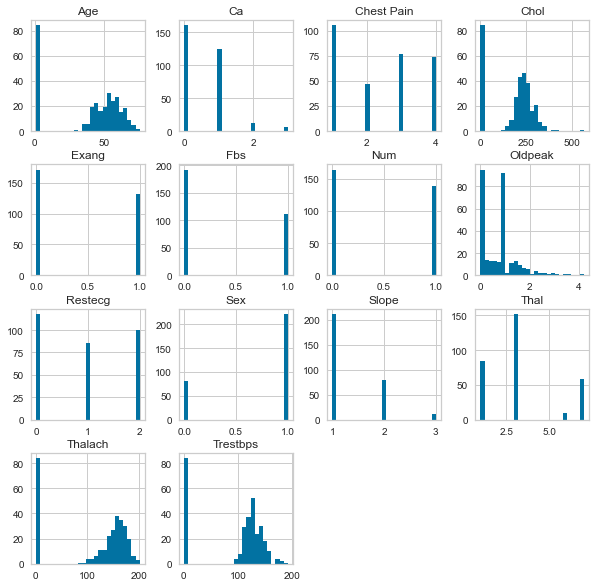

In [82]:
# histograms
df.hist( bins=25, figsize=(10,10) )
plt.show()

## 4.4. Correlation

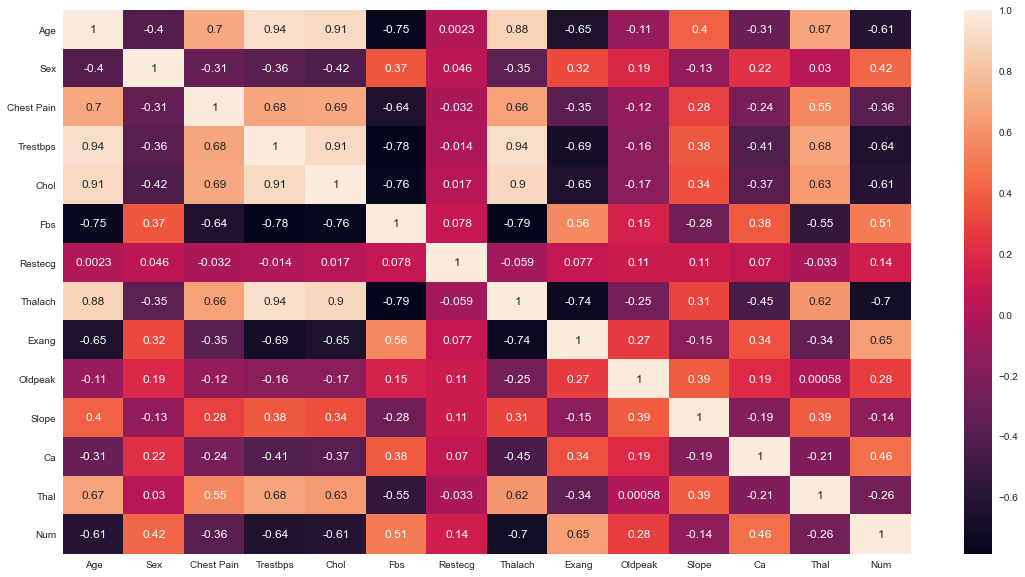

In [83]:
# ploting heatmap
plt.figure( figsize=(19,10), facecolor='white' )
sb.heatmap( df.corr(), annot=True )

## 4.5. Splitting dataset

In [84]:
# Separating features and target variable
X = df.iloc[:, 0:13].copy()
y = df.iloc[:, -1].copy()

# Splitting data
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=109 )

## 4.6. Normalization

In [85]:
# Data normalization
norm = MinMaxScaler()

# Fit data
norm_fit = norm.fit( X_train )
X_train = norm_fit.transform( X_train )
X_test = norm_fit.transform( X_test )

# 5. Models Generation

## Functions

In [86]:
def fit_model( X_train, y_train, model ):
    # Create a Gaussian Classifier
    model = model

    # Train the model using the training sets
    model.fit( X_train, y_train )
    
    return model

def show_model_performance( X_test, y_test, model ):
    # Predict the response for test dataset
    y_pred = model.predict( X_test )
    
    # Model Accuracy
    print( 'Accuracy: ', metrics.accuracy_score( y_test, y_pred ) )
    
    # Confusion Matrix
    print( 'Confusion Matrix: \n', metrics.confusion_matrix( y_test, y_pred ) )
    
    return None

def show_confusion_matrix( model, X_train, y_train, X_test, y_test ):
    v = ConfusionMatrix( model )
    v.fit( X_train, y_train )
    v.score( X_test, y_test )
    v.poof()
    
    return None

def cross_validation( model ):
    # Spliting data in features and target
    X = df.iloc[:, 0:13]
    y = df.iloc[:, -1]

    # Get model performance
    n_scores = cross_val_score( model, X, y, cv=5, scoring='accuracy' )

    print( 'Accuracy: ', np.mean( n_scores ) )
    print( 'Scores: ', n_scores )
    
    return None

## 5.1. Naive Bayes

In [87]:
# Fit data with Naive Bayes model
gnb = fit_model( X_train, y_train, GaussianNB() )

In [88]:
# Model performance
show_model_performance( X_test, y_test, gnb )

Accuracy:  0.8021978021978022
Confusion Matrix: 
 [[55  0]
 [18 18]]


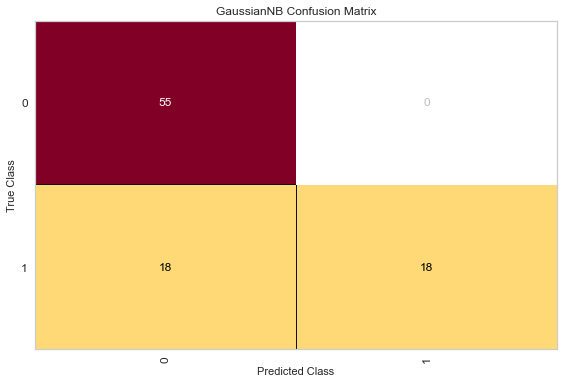

In [89]:
# Confusion Matrix with yellowbrick
show_confusion_matrix( GaussianNB(), X_train, y_train, X_test, y_test )

In [90]:
# Cross validation technique
cross_validation( GaussianNB() )

Accuracy:  0.825136612021858
Scores:  [0.80327869 0.83606557 0.81967213 0.85       0.81666667]


## 5.2. Linear Discriminant

In [91]:
# Fit data with Naive Bayes model
lda = fit_model( X_train, y_train, LinearDiscriminantAnalysis() )

In [92]:
# Predict the response for test dataset
y_pred = []
for i in X_test:
    y_pred.append(int(lda.predict(i.reshape(1, -1))))

# Model Accuracy
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

# Confusion Matrix
print('Confusion Matrix: \n', metrics.confusion_matrix(y_test, y_pred))

Accuracy:  0.8571428571428571
Confusion Matrix: 
 [[49  6]
 [ 7 29]]


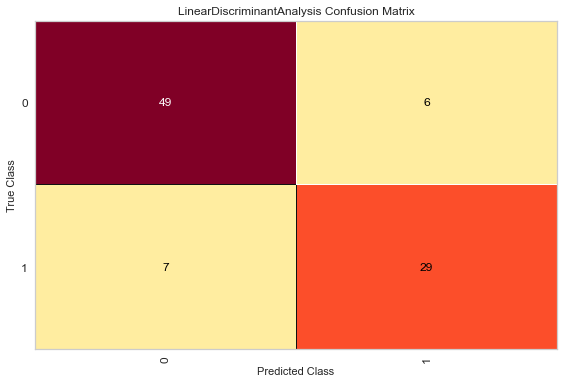

In [93]:
# Confusion Matrix with yellowbrick
show_confusion_matrix( LinearDiscriminantAnalysis(), X_train, y_train, X_test, y_test )

In [94]:
# Cross validation technique
cross_validation( LinearDiscriminantAnalysis() )

Accuracy:  0.8712021857923498
Scores:  [0.90163934 0.8852459  0.85245902 0.9        0.81666667]
